## Python áttekintés

-  Az óra célja, hogy megismerkedjünk a Pandas DataFrame fogalmával és annak használatával.
-  Megtanuljuk, hogyan lehet adatokat beolvasni, módosítani és elemezni egy DataFrame segítségével.
-  Az óra végére a hallgatók képesek lesznek egyszerű adatmanipulációkat végrehajtani Pythonban.

### Bevezetés

Mi az a DataFrame?
-  Táblázatos adatstruktúra (hasonlít az Excel táblázatra vagy SQL táblára).
-  Sorokból és oszlopokból áll, indexekkel és címkékkel.

Miért fontos a DataFrame a Data Science-ben?
-  Adattárolás és manipuláció hatékony módja.
-  Könnyű beolvasás, átalakítás és vizualizáció.

Szükséges Python csomagok
- pandas, numpy, matplotlib
- Telepítés(Ha szükséges): pip install pandas numpy matplotlib


### Kitekintő:

Angol nyelvű videó a dataframe-kről: [katt ide](youtube.com/watch?v=eQ0xPt6hIfs)



### DataFrame létrehozása listákból és szótárakból

Képzeljük el, hogy egy kis adatbázist hozunk létre egy vállalat dolgozóiról. 

Hogyan alakítjuk ezt DataFrame formátumba?

In [14]:
# A pandas csomag importálása (rövidítve 'pd'-ként szokás használni)
import pandas as pd 

# Egy szótár (dictionary) létrehozása, ahol minden kulcshoz egy lista tartozik
# - 'Név' oszlop: három ember neve
# - 'Kor' oszlop: életkorok
# - 'Város' oszlop: lakóhelyek
data = {'Név': ['Anna', 'Béla', 'Csaba'],
        'Kor': [23, 45, 32],
        'Város': ['Budapest', 'Szeged', 'Debrecen']}

In [16]:
display(data)

{'Név': ['Anna', 'Béla', 'Csaba'],
 'Kor': [23, 45, 32],
 'Város': ['Budapest', 'Szeged', 'Debrecen']}

In [22]:
# A pandas DataFrame az adatok táblázatos formában való tárolására szolgál.
# Itt a szótár kulcsai lesznek az oszlopok nevei, a listák elemei pedig a sorok értékei.
df = pd.DataFrame(data)

In [24]:
# A DataFrame kiíratása a konzolra.
# (Jupyter notebookban a 'display(df)' szebb, táblázatos formátumban mutatja az eredményt.)
display(df)

,Név,Kor,Város
0,Anna,23,Budapest
1,Béla,45,Szeged
2,Csaba,32,Debrecen


DataFrame létrehozása listákból

In [26]:
# Három külön listában tároljuk az adatokat
nevek = ['Anna', 'Béla', 'Csaba']          # nevek listája
korok = [23, 45, 32]                       # életkorok listája
varosok = ['Budapest', 'Szeged', 'Debrecen']  # városok listája

In [28]:
print(nevek)
print(korok)
print(varosok)

['Anna', 'Béla', 'Csaba']
[23, 45, 32]
['Budapest', 'Szeged', 'Debrecen']


In [32]:
# A zip() függvény "összecsomagolja" a listák elemeit:
# [('Anna', 23, 'Budapest'),
#  ('Béla', 45, 'Szeged'),
#  ('Csaba', 32, 'Debrecen')]
# Vagyis minden sor egy tuple (név, kor, város).
# A list() átalakítja a zip objektumot tényleges listává.
list(zip(nevek, korok, varosok))

[('Anna', 23, 'Budapest'), ('Béla', 45, 'Szeged'), ('Csaba', 32, 'Debrecen')]

In [34]:
# Ezután a pandas DataFrame-be töltjük az adatokat,
# és megadjuk az oszlopneveket a 'columns' paraméterrel.
df = pd.DataFrame(list(zip(nevek, korok, varosok)),
                  columns=['Név', 'Kor', 'Város'])

In [36]:
# Jupyter notebookban a display() függvény szépen táblázatosan jeleníti meg az adatokat.
display(df)

,Név,Kor,Város
0,Anna,23,Budapest
1,Béla,45,Szeged
2,Csaba,32,Debrecen


 DataFrame létrehozása listák listájából

In [38]:
# Egy listát hozunk létre, amelynek minden eleme egy újabb lista.
# Minden belső lista egy adat-sor: [név, kor, város].
adatok = [
    ['Anna', 23, 'Budapest'],
    ['Béla', 45, 'Szeged'],
    ['Csaba', 32, 'Debrecen']
]

# A DataFrame létrehozásakor:
# - az 'adatok' listát sorokként értelmezi,
# - a 'columns' paraméterben adjuk meg az oszlopneveket.
df = pd.DataFrame(adatok, columns=['Név', 'Kor', 'Város'])

# A DataFrame kiíratása a konzolra.
# (Jupyterben a display(df) szebb, táblázatos formátumban mutatja.)
print(df)


     Név  Kor     Város
0   Anna   23  Budapest
1   Béla   45    Szeged
2  Csaba   32  Debrecen


 DataFrame létrehozása NumPy tömbből

 Ha az adatokat NumPy tömbként kapjuk meg (pl. gépi tanulási modellekből vagy matematikai műveletekből), akkor a pandas.DataFrame() konstruktorral könnyen átalakíthatjuk.

In [40]:
import numpy as np # A NumPy könyvtár importálása (tömbök és matematikai műveletek kezelésére)

# Egy NumPy tömb (numpy.array) létrehozása.
# A tömb minden sora egy ember adatait tartalmazza: [név, kor, város].
numpy_array = np.array([
    ['Anna', 23, 'Budapest'],
    ['Béla', 45, 'Szeged'],
    ['Csaba', 32, 'Debrecen']
])

# A NumPy tömböt átadjuk a pandas DataFrame konstruktorának.
# A 'columns' paraméter megadja az oszlopok neveit.
df = pd.DataFrame(numpy_array, columns=['Név', 'Kor', 'Város'])


# A DataFrame kiíratása a konzolra.
# (Jupyterben érdemesebb a display(df)-et használni.)
print(df)


     Név Kor     Város
0   Anna  23  Budapest
1   Béla  45    Szeged
2  Csaba  32  Debrecen


Előnyök:

Ha a forrásadatokat NumPy tömbként kapjuk meg (pl. gépi tanulási adatok), ezt a módszert használhatjuk.
Gyorsabb lehet nagy adathalmazok esetén.

### DataFrame létrehozása/olvasás egy CSV fájlból

A való világban az adatokat gyakran CSV fájlokból olvassuk be. A pandas read_csv() függvénye erre a legjobb megoldás.

In [45]:
# Egy CSV (Comma-Separated Values) fájl beolvasása közvetlenül az internetről.
# A pandas read_csv() függvénye automatikusan letölti és beolvassa a táblázatot DataFrame-ként.
# az adat olvasható a bármilyen akár lokális utvonalról is.
df = pd.read_csv('https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

# A head() függvény alapértelmezetten az első 5 sort mutatja.
# Ez hasznos, ha gyorsan át szeretnénk tekinteni, hogy milyen adatok vannak a táblázatban.
display(df.head())  # Első 5 sor kiíratása

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Előnyök:

- Egyszerű, ha az adatokat külső forrásból (pl. Excel, adatbázis) kapjuk meg.
- A pandas automatikusan kezeli a hiányzó értékeket.
- A szeparátor alap beállitás szerint a ",", amennyiben más a szeparátor, úgy ezt jelezni kell. Bővebben: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

### CSV fájl beolvasása különböző paraméterekkel

A való életben a CSV fájlok **nagyon eltérő formátumokban** fordulhatnak elő:  
- más elválasztó jelet használhatnak (, helyett ; vagy tabulátor),  
- előfordulhat, hogy nincs fejléc, vagy nem az első sorban van,  
- lehetnek speciális karakterek, ékezetek, vagy hiányzó értékek különböző jelölésekkel.  

A pandas.read_csv() függvény sok paramétert kínál ezek kezelésére.  
Néhány gyakran használt beállítás:  

- sep → oszlopelválasztó karakter megadása  
- header / names → fejléc sora vagy saját oszlopnevek  
- index_col → melyik oszlop legyen index  
- usecols → csak bizonyos oszlopok betöltése  
- dtype → adattípusok előírása  
- na_values → hiányzó adatok jelöléseinek megadása  
- skiprows, nrows → sorok kihagyása / korlátozott számú sor betöltése  
- encoding → fájl kódolása (pl. ékezetes betűk miatt fontos lehet)

Az alábbi példában bemutatjuk, hogyan lehet ezeket a paramétereket használni az adatbetöltésnél.


In [51]:
# CSV beolvasása különböző hasznos paraméterekkel
df = pd.read_csv(
    'https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv',           # fájl elérési útja vagy URL
    sep=",",              # oszlopelválasztó (pl. ";" vagy "\t" is lehet)
    header=0,             # melyik sort tekintsük fejlécnek (0 = első sor)
    names=None,           # ha nincs fejléc, mi adjuk meg az oszlopneveket pl. ['A','B','C']
    index_col=None,       # melyik oszlop legyen az index (pl. 'ID')
    usecols=None,         # ha csak bizonyos oszlopokra van szükség, pl. ['sepal.length','variety']
    dtype=None,           # adattípusok előírása, pl. {'sepal.length': float, 'variety': 'category'}
    na_values=["?", "NA"],# milyen értékeket kezeljen hiányzó adatnak
    skiprows=0,           # hány sort hagyjunk ki a fájl elejéről
    nrows=None,           # hány sort olvassunk be (pl. teszteléshez nrows=100)
    encoding="utf-8"      # fájl kódolása (gyakran kell pl. "latin1" vagy "cp1250" magyar ékezetekhez)
)

# Gyors ellenőrzés
print(df.head())


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


### DataFrame létrehozása/olvasása egy Excel fájlból

Ha az adatok Excel formátumban érhetők el, akkor a read_excel() függvényt használhatjuk.

In [57]:
# Excel fájl beolvasása közvetlenül egy URL-ről.
# A pandas read_excel() függvény hasonlóan működik, mint a read_csv(),
# de Excel fájlok (XLS, XLSX) kezelésére használjuk.

# Fontos paraméterek közül itt a 'sheet_name':
# - Egy Excel fájlban több munkalap (sheet) is lehet.
# - A 'sheet_name' paraméterrel megadhatjuk, melyiket olvassuk be.
# - Értéke lehet: a munkalap neve (string), a sorszáma (0-al kezdődik), vagy lista több laphoz.
df = pd.read_excel('https://github.com/h2oai/h2o-2/raw/refs/heads/master/smalldata/iris/iris.xlsx', sheet_name='iris2.csv')  # Excel fájl beolvasása
display(df.head())  # Első 5 sor


C:\Users\koros\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Előnyök:

- Ha Excelből dolgozunk, ez a legjobb módszer.
- Több munkalapot is kezelhetünk a sheet_name paraméterrel.

### Excel fájlok beolvasása – fontos paraméterek

Az Excel fájlok gyakran több munkalapot, üres sorokat vagy vegyes formátumokat tartalmaznak.  
A pandas.read_excel() függvény sok beállítást kínál ezek kezelésére.  

**Gyakran használt paraméterek:**

- sheet_name → melyik munkalapot olvassuk be  
  - lehet név ("Sheet1"), sorszám (0), lista több laphoz ([0, "Adatok"]), vagy None az összeshez  
- header → melyik sor a fejléc (pl. 0, vagy None, ha nincs fejléc)  
- names → saját oszlopnevek megadása, ha a fájlban nincs fejléc  
- index_col → melyik oszlop legyen az index (pl. "ID")  
- usecols → csak bizonyos oszlopokat töltsünk be (pl. "A:C" vagy lista: ["Név", "Kor"])  
- skiprows → hány sort hagyjunk ki a fájl elejéről  
- nrows → csak bizonyos számú sor betöltése (pl. teszteléshez nrows=100)  
- dtype → adattípusok előírása (pl. {"Kor": int})  
- na_values → mely értékeket tekintsük hiányzó adatnak (pl. "NA", "-")  
- engine → az olvasó motor: openpyxl (xlsx), xlrd (régi xls), odf (ods fájlokhoz)  

Ezekkel a paraméterekkel rugalmasan kezelhetjük a valós, gyakran rendezetlen Excel fájlokat.  


In [5]:
# Excel fájl beolvasása különböző paraméterekkel
df = pd.read_excel(
    "https://github.com/h2oai/h2o-2/raw/refs/heads/master/smalldata/iris/iris.xlsx",          # fájl elérési útja vagy URL
    sheet_name="iris2.csv",  # megadható a munkalap neve, sorszáma vagy lista több laphoz
    header=0,             # melyik sort tekintsük fejlécnek (0 = első sor)
    names=None,           # ha nincs fejléc, itt adhatjuk meg az oszlopneveket
    index_col=None,       # melyik oszlop legyen az index (pl. "ID")
    usecols=None,         # csak bizonyos oszlopok beolvasása, pl. "A:C" vagy ["Név","Kor"]
    skiprows=0,           # hány sort hagyjunk ki a fájl elejéről
    nrows=None,           # csak bizonyos számú sort olvassunk be (pl. nrows=100 teszteléshez)
    dtype=None,           # oszlopok adattípusának beállítása (pl. {"Kor": int})
    na_values=["NA","-"], # hiányzó adatok egyedi jelölései
    engine="openpyxl"     # beolvasó motor (xlsx esetén gyakran "openpyxl", régi xls-nél "xlrd")
)

print(df.head())

NameError: name 'pd' is not defined

In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


### DataFrame létrehozása/olvasása JSON adatokból

Ha az adatokat web API-ból vagy JSON fájlból kapjuk, akkor a read_json() függvényt használhatjuk.

In [69]:
# JSON fájl beolvasása közvetlenül egy URL-ről.
# A JSON (JavaScript Object Notation) egy gyakran használt formátum
# strukturált adatok tárolására és cseréjére (pl. webes API-kban).
# A pandas read_json() függvény képes a JSON-t közvetlenül DataFrame-be alakítani.
df = pd.read_json('https://github.com/domoritz/maps/raw/refs/heads/master/data/iris.json')  # JSON fájl beolvasása
display(df.head())

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Előnyök:

- Kiváló API-adatok beolvasására.
- Gyors és könnyen olvasható.

### JSON fájlok beolvasása

A pandas.read_json() segítségével közvetlenül betölthetünk JSON formátumú adatokat.  
A JSON (JavaScript Object Notation) elterjedt adattípus webes API-k és adatcserék esetében.  

**Gyakran használt paraméterek:**

- orient → megadja az adatszerkezet típusát  
  - "records": listák listája (pl. [{"a":1,"b":2}, {"a":3,"b":4}])  
  - "columns": oszlop-alapú tárolás  
  - "index": indexelt tárolás  
- typ → visszatérési típus: "frame" (DataFrame) vagy "series" (egyoszlopos adatokhoz)  
- convert_dates → automatikusan dátum-típusra konvertálja az időbélyegeket  
- lines → ha minden sor egy külön JSON objektum (pl. log fájloknál), akkor lines=True  
- encoding → karakterkódolás megadása (pl. "utf-8", "latin1")  

A read_json különösen hasznos, ha **webes API-kból** jön az adat, mivel az API-k többsége JSON-t ad vissza.  


In [75]:

# JSON fájl beolvasása különböző paraméterekkel
df = pd.read_json(
    'https://github.com/domoritz/maps/raw/refs/heads/master/data/iris.json',            # fájl elérési útja vagy URL
    orient=None,            # adatok szervezése: 'records', 'columns', 'index' stb.
    typ="frame",            # az eredmény típusa: 'frame' = DataFrame, 'series' = pandas Series
    convert_dates=True,     # dátumként értelmezi a megfelelő mezőket
    keep_default_dates=True,# beépített dátumfelismerés engedélyezése
    precise_float=False,    # nagy pontosságú float értékek megőrzése
    lines=False,            # ha a JSON több sorban van (1 sor = 1 rekord), akkor lines=True
    encoding="utf-8"        # a fájl kódolása
)

print(df.head())



   sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


### DataFrame létrehozása adatbázisból (SQL, Mongo, stb)

Ha az adatokat SQL adatbázisból szeretnénk beolvasni, használhatjuk a pandas.read_sql() függvényt.




import sqlite3

# Kapcsolódás az adatbázishoz
conn = sqlite3.connect('adatbazis.db')

# SQL lekérdezés futtatása és beolvasás DataFrame-be
df = pd.read_sql("SELECT * FROM felhasznalok", conn)

print(df.head())


Előnyök:

- Ha az adatokat adatbázisban tároljuk, ez a legjobb módszer.
- Egyszerűen csatlakozhatunk MySQL, PostgreSQL vagy SQLite adatbázisokhoz.

### Összegzés


Szótárból (dict)

In [84]:
import pandas as pd

# Adatok szótárként
data_dict = {
    "Módszer": ["Szótár (dict)", "Lista (list of lists)", "Listák zip() függvénnyel",
                "NumPy tömb (array)", "CSV fájl", "Excel fájl", "JSON fájl", "SQL adatbázis"],
    "Használat": ["Kis méretű adatokhoz", "Táblázatos adatok", "Egyszerű listákhoz",
                  "Matematikai műveletek", "Valós adathalmazok", "Táblázatos adatok",
                  "API-adatok beolvasása", "Nagy adathalmazok"],
    "Előnyök": ["Gyors és könnyen olvasható", "Könnyen átalakítható", "Könnyen kombinálható más adattípusokkal",
                "Gyors feldolgozás nagy adathalmazoknál", "Könnyű integráció más adatforrásokkal",
                "Több munkalapot is kezel", "Könnyű adatcsere", "Hatékony lekérdezések"]
}

# DataFrame létrehozása
df_dict = pd.DataFrame(data_dict)
display(df_dict)


,Módszer,Használat,Előnyök
0,Szótár (dict),Kis méretű adatokhoz,Gyors és könnyen olvasható
1,Lista (list of lists),Táblázatos adatok,Könnyen átalakítható
2,Listák zip() függvénnyel,Egyszerű listákhoz,Könnyen kombinálható más adattípusokkal
3,NumPy tömb (array),Matematikai műveletek,Gyors feldolgozás nagy adathalmazoknál
4,CSV fájl,Valós adathalmazok,Könnyű integráció más adatforrásokkal
5,Excel fájl,Táblázatos adatok,Több munkalapot is kezel
6,JSON fájl,API-adatok beolvasása,Könnyű adatcsere
7,SQL adatbázis,Nagy adathalmazok,Hatékony lekérdezések


Lista listákból

In [87]:
# Lista lista formátumban
data_list = [
    ["Szótár (dict)", "Kis méretű adatokhoz", "Gyors és könnyen olvasható"],
    ["Lista (list of lists)", "Táblázatos adatok", "Könnyen átalakítható"],
    ["Listák zip() függvénnyel", "Egyszerű listákhoz", "Könnyen kombinálható más adattípusokkal"],
    ["NumPy tömb (array)", "Matematikai műveletek", "Gyors feldolgozás nagy adathalmazoknál"],
    ["CSV fájl", "Valós adathalmazok", "Könnyű integráció más adatforrásokkal"],
    ["Excel fájl", "Táblázatos adatok", "Több munkalapot is kezel"],
    ["JSON fájl", "API-adatok beolvasása", "Könnyű adatcsere"],
    ["SQL adatbázis", "Nagy adathalmazok", "Hatékony lekérdezések"]
]

# DataFrame létrehozása
df_list = pd.DataFrame(data_list, columns=["Módszer", "Használat", "Előnyök"])
display(df_list)


,Módszer,Használat,Előnyök
0,Szótár (dict),Kis méretű adatokhoz,Gyors és könnyen olvasható
1,Lista (list of lists),Táblázatos adatok,Könnyen átalakítható
2,Listák zip() függvénnyel,Egyszerű listákhoz,Könnyen kombinálható más adattípusokkal
3,NumPy tömb (array),Matematikai műveletek,Gyors feldolgozás nagy adathalmazoknál
4,CSV fájl,Valós adathalmazok,Könnyű integráció más adatforrásokkal
5,Excel fájl,Táblázatos adatok,Több munkalapot is kezel
6,JSON fájl,API-adatok beolvasása,Könnyű adatcsere
7,SQL adatbázis,Nagy adathalmazok,Hatékony lekérdezések


Listák zip() függvénnyel

In [90]:
# Adatok külön listákban
methods = ["Szótár (dict)", "Lista (list of lists)", "Listák zip() függvénnyel",
           "NumPy tömb (array)", "CSV fájl", "Excel fájl", "JSON fájl", "SQL adatbázis"]

usage = ["Kis méretű adatokhoz", "Táblázatos adatok", "Egyszerű listákhoz",
         "Matematikai műveletek", "Valós adathalmazok", "Táblázatos adatok",
         "API-adatok beolvasása", "Nagy adathalmazok"]

advantages = ["Gyors és könnyen olvasható", "Könnyen átalakítható", "Könnyen kombinálható más adattípusokkal",
              "Gyors feldolgozás nagy adathalmazoknál", "Könnyű integráció más adatforrásokkal",
              "Több munkalapot is kezel", "Könnyű adatcsere", "Hatékony lekérdezések"]

# DataFrame létrehozása
df_zip = pd.DataFrame(zip(methods, usage, advantages), columns=["Módszer", "Használat", "Előnyök"])
display(df_zip)


,Módszer,Használat,Előnyök
0,Szótár (dict),Kis méretű adatokhoz,Gyors és könnyen olvasható
1,Lista (list of lists),Táblázatos adatok,Könnyen átalakítható
2,Listák zip() függvénnyel,Egyszerű listákhoz,Könnyen kombinálható más adattípusokkal
3,NumPy tömb (array),Matematikai műveletek,Gyors feldolgozás nagy adathalmazoknál
4,CSV fájl,Valós adathalmazok,Könnyű integráció más adatforrásokkal
5,Excel fájl,Táblázatos adatok,Több munkalapot is kezel
6,JSON fájl,API-adatok beolvasása,Könnyű adatcsere
7,SQL adatbázis,Nagy adathalmazok,Hatékony lekérdezések


 NumPy tömbből

In [93]:
import numpy as np

# NumPy tömb létrehozása
data_numpy = np.array(data_list)

# DataFrame létrehozása NumPy tömbből
df_numpy = pd.DataFrame(data_numpy, columns=["Módszer", "Használat", "Előnyök"])
display(df_numpy)


,Módszer,Használat,Előnyök
0,Szótár (dict),Kis méretű adatokhoz,Gyors és könnyen olvasható
1,Lista (list of lists),Táblázatos adatok,Könnyen átalakítható
2,Listák zip() függvénnyel,Egyszerű listákhoz,Könnyen kombinálható más adattípusokkal
3,NumPy tömb (array),Matematikai műveletek,Gyors feldolgozás nagy adathalmazoknál
4,CSV fájl,Valós adathalmazok,Könnyű integráció más adatforrásokkal
5,Excel fájl,Táblázatos adatok,Több munkalapot is kezel
6,JSON fájl,API-adatok beolvasása,Könnyű adatcsere
7,SQL adatbázis,Nagy adathalmazok,Hatékony lekérdezések


JSON formátumból

In [96]:
import json

# JSON adat
json_data = json.dumps(data_dict)  # Python szótár JSON formátumba konvertálása
df_json = pd.read_json(json_data)

display(df_json)


C:\Users\koros\AppData\Local\Temp\ipykernel_3632\4095617375.py:5: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_json = pd.read_json(json_data)


,Módszer,Használat,Előnyök
0,Szótár (dict),Kis méretű adatokhoz,Gyors és könnyen olvasható
1,Lista (list of lists),Táblázatos adatok,Könnyen átalakítható
2,Listák zip() függvénnyel,Egyszerű listákhoz,Könnyen kombinálható más adattípusokkal
3,NumPy tömb (array),Matematikai műveletek,Gyors feldolgozás nagy adathalmazoknál
4,CSV fájl,Valós adathalmazok,Könnyű integráció más adatforrásokkal
5,Excel fájl,Táblázatos adatok,Több munkalapot is kezel
6,JSON fájl,API-adatok beolvasása,Könnyű adatcsere
7,SQL adatbázis,Nagy adathalmazok,Hatékony lekérdezések


### Az IRIS adathalmaz

Az Iris dataset egy klasszikus adathalmaz a gépi tanulás és adatelemzés világában. Ez az adathalmaz 150 virágmintát tartalmaz, amelyek három különböző iris fajhoz tartoznak (setosa, versicolor, virginica).

Minden egyes virágminta négy jellemzővel rendelkezik:

- sepal.length (csészelevél hossza, cm)
- sepal.width (csészelevél szélessége, cm)
- petal.length (szirom hossza, cm)
- petal.width (szirom szélessége, cm)
- variety (az iris faj neve)

Adatok betöltése

In [100]:
import pandas as pd

# Iris dataset beolvasása
df = pd.read_csv('https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

# Első 5 sor megtekintése
display(df.head())



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Oszlopok elérése (Columns Selection)

### Egyetlen oszlop kiválasztása

Ha csak egy oszlopot szeretnénk elérni, akkor használhatjuk a név szerinti hivatkozást:

In [104]:
display(df["sepal.length"])  # Csészelevél hossza oszlop kiírása


0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

Ez egy Pandas Series objektumot ad vissza.


### Több oszlop kiválasztása

Ha több oszlopot szeretnénk egyszerre elérni, akkor ezt egy listával adhatjuk meg:

In [108]:
df_subset = df[["sepal.length", "sepal.width"]]  # Kiválasztunk két oszlopot
display(df_subset.head())


,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### Oszlopok kiválasztása pozíció alapján (iloc)

Néha nem ismerjük az oszlop nevét, hanem csak a pozícióját. Erre való az .iloc:

In [111]:
display(df.iloc[:, 0])  # Az első oszlop kiíratása
display(df.iloc[:, [0, 1]])  # Az első és második oszlop kiíratása


0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Sorok elérése (Rows Selection)

### Egy adott sor kiválasztása index alapján

A .iloc[] segítségével sorszám alapján érhetünk el sorokat:

In [115]:
display(df.iloc[0])  # Az első sor kiíratása


sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

Több sor kiválasztása:

In [118]:
display(df.iloc[0:5])  # Az első 5 sor kiíratása


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Egy adott sor kiválasztása index név alapján (loc)

Ha az adatok tartalmaznak egyedi indexeket (pl. ID-ket vagy neveket), akkor loc[]-ot használhatunk:

In [121]:
print(df.loc[0])  # Az első sor kiíratása név szerinti indexelés alapján


sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object


Több sor kiválasztása név alapján:

In [124]:
print(df.loc[[0, 1, 2]])  # Az első három sor lekérése


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa


 ### Sorok szűrése feltételek alapján

 Ha például csak a Setosa fajtájú mintákat szeretnénk lekérdezni:

In [127]:
df_setosa = df[df["variety"] == "Setosa"]
print(df_setosa.head())


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


Ha több feltételt szeretnénk alkalmazni (pl. csak a 5 cm-nél hosszabb csészelevéllel rendelkező Setosa példányokat):

In [130]:
df_filtered = df[(df["variety"] == "Setosa") & (df["sepal.length"] > 5)]
print(df_filtered.head())


    sepal.length  sepal.width  petal.length  petal.width variety
0            5.1          3.5           1.4          0.2  Setosa
5            5.4          3.9           1.7          0.4  Setosa
10           5.4          3.7           1.5          0.2  Setosa
14           5.8          4.0           1.2          0.2  Setosa
15           5.7          4.4           1.5          0.4  Setosa


### Oszlopok és sorok kombinált kiválasztása

Ha konkrét sorokat és oszlopokat is szeretnénk kiválasztani, kombinálhatjuk az .iloc[] vagy .loc[] metódusokat:

In [133]:
print(df.iloc[0:5, 0:2])  # Az első 5 sor és az első 2 oszlop


   sepal.length  sepal.width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


Ha név szerint szeretnénk szűrni:

In [136]:
print(df.loc[0:5, ["sepal.length", "variety"]])  # Első 5 sor, és két oszlop


   sepal.length variety
0           5.1  Setosa
1           4.9  Setosa
2           4.7  Setosa
3           4.6  Setosa
4           5.0  Setosa
5           5.4  Setosa


## Data Science projekt

Egy Data Science projekt első lépése mindig az adatok beolvasása és az adatok alapvető vizsgálata. Miután egy új adathalmazt betöltöttünk, a következő műveleteket szoktuk elvégezni:

### Adatok méretének és oszlopok listájának ellenőrzése

Fontos megnézni, hogy hány sor és hány oszlop van az adathalmazban.

In [287]:
# Egy CSV (Comma-Separated Values) fájl beolvasása közvetlenül az internetről.
# A pandas read_csv() függvénye automatikusan letölti és beolvassa a táblázatot DataFrame-ként.
# az adat olvasható a bármilyen akár lokális utvonalról is.
df = pd.read_csv('https://gist.github.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

print(df.shape)  # Sorok és oszlopok száma
print(df.columns)  # Oszlopnevek listája


(150, 5)
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


### Alapvető statisztikák

A Pandas describe() függvénye gyors statisztikai összegzést ad a numerikus oszlopokra.

In [290]:
print(df.describe())


       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Mit nézünk itt?

- Átlag (mean): Például az átlagos csészelevél hossz 5.84 cm.
- Szórás (std): A csészelevél hossza kb. 0.83 cm-es szórással változik.
- Minimum és maximum (min, max): Segít az adatok szélsőértékeinek azonosításában.
- Medián (50%): Megmutatja az eloszlás középpontját.

### Hiányzó értékek keresése

Gyakori probléma, hogy egy adathalmazban hiányzó értékek találhatók. Ezt a isnull().sum() függvénnyel tudjuk ellenőrizni.

In [294]:
# A hiányzó értékek (NaN) ellenőrzése az adathalmazban.
# - df.isnull() → minden cellára True/False értéket ad vissza (True, ha az adott érték hiányzik).
# - df.isnull().sum() → oszloponként összeadja a True értékeket,
#   így megkapjuk, hogy az egyes oszlopokban hány hiányzó adat található.
print(df.isnull().sum())

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


Mit nézünk itt?

- Ha valamelyik oszlopban nem nulla értékek vannak, akkor ott hiányzó adatok vannak.
- Ha lenne hiányzó adat, akkor df.fillna() vagy df.dropna()-val kezelhetnénk.

### Adattípusok és konverziók

Ellenőrizzük az oszlopok adattípusait, hogy biztosak legyünk abban, hogy a megfelelő típust kaptuk.

In [298]:
print(df.dtypes)

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object


Mit nézünk itt?

- A számoknak (float64) kell lenniük.
- A "variety" oszlop szöveg (object) típusú, ami megfelelő.

### Egy oszlop statisztikai vizsgálata

A pandas lehetőséget ad arra, hogy **egy konkrét oszlopon** (Series-en) végezzünk alapvető statisztikai műveleteket.  
Ez különösen hasznos, ha egy változó (például az iris dataset sepal.length oszlopa) eloszlását szeretnénk gyorsan megérteni.  

**Gyakran használt függvények:**

- .count() → a nem hiányzó értékek száma  
- .sum() → az oszlop összege  
- .mean() → átlag  
- .min(), .max() → legkisebb és legnagyobb érték  
- .median() → medián (középső érték)  
- .std() → szórás (szóródás mértéke)  
- .describe() → összefoglaló statisztika (count, mean, std, min, percentilisek, max)  

Például az iris dataset sepal.length oszlopán rögtön látszik, hogy:  
- 150 értéket tartalmaz,  
- az átlag kb. **5.84**,  
- a minimum **4.3**, a maximum **7.9**.  


További PANDAS lehetőségekért [katt ide](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [302]:
# Egy konkrét oszlop kiválasztása
col = df["sepal.length"]

# .count() → nem hiányzó értékek száma
print("Nem hiányzó értékek száma:", col.count())

# .sum() → az oszlop értékeinek összege
print("Összeg:", col.sum())

# .mean() → átlag
print("Átlag:", col.mean())

# .min() és .max() → minimum és maximum
print("Minimum:", col.min())
print("Maximum:", col.max())

# .median() → medián (középső érték)
print("Medián:", col.median())

# .std() → szórás
print("Szórás:", col.std())

# .describe() → összefoglaló statisztika egy oszlopra
print("\nLeíró statisztika:\n", col.describe())


Nem hiányzó értékek száma: 150
Összeg: 876.5
Átlag: 5.843333333333334
Minimum: 4.3
Maximum: 7.9
Medián: 5.8
Szórás: 0.8280661279778629

Leíró statisztika:
 count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal.length, dtype: float64


### Duplikált sorok eltávolítása

Adatkészletekben gyakran előfordulnak **ismétlődő sorok** (pl. ugyanaz a megfigyelés kétszer szerepel).  
A drop_duplicates() segítségével ezeket eltávolíthatjuk.

**Fontos paraméterek:**

- subset → csak bizonyos oszlopok alapján keresi a duplikátumokat  
  *(pl. subset=["sepal.length","sepal.width"] csak a virág szirmait hasonlítja össze)*  
- keep → melyik előfordulást hagyja meg  
  - "first": az első marad, a többi törlődik (alapértelmezett)  
  - "last": az utolsó marad meg  
  - False: minden duplikátum törlődik  
- inplace → True esetén közvetlenül módosítja az eredeti DataFrame-et  
- ignore_index → új indexet generál a megtisztított táblázathoz  

Az iris datasetben ritkán vannak duplikátumok, de ez a művelet általános adat-előkészítési lépés.  


In [305]:
print(df.duplicated().sum())  # Hány duplikált sor van?

1


Ha lenne duplikált adat:

In [308]:
# Duplikált sorok eltávolítása a DataFrame-ből
# Alapértelmezetten a teljes sort hasonlítja össze (minden oszlop értékét).
df = df.drop_duplicates()

# Paraméterek:
# subset     → csak bizonyos oszlopokat vesz figyelembe az összehasonlításnál
#              pl. df.drop_duplicates(subset=["sepal.length", "sepal.width"])
#
# keep       → megadhatjuk, melyik előfordulást tartsuk meg:
#              'first' (alapértelmezett) → az első előfordulás marad meg
#              'last' → az utolsó előfordulás marad meg
#              False → minden duplikátum eltávolításra kerül
#
# inplace    → ha True, akkor a művelet közvetlenül az eredeti DataFrame-en hajtódik végre
#              (nem ad vissza új példányt, hanem módosítja a meglévőt)
#
# ignore_index → ha True, újraszámozza az indexet a tisztított DataFrame-ben


Mit nézünk itt?

- Ha duplikált adatok vannak, akkor el kell távolítani őket, hogy ne torzítsák az elemzést.

### Egyedi értékek vizsgálata

A variety oszlopban milyen egyedi értékek találhatók?

In [312]:
print(df["variety"].unique())

['Setosa' 'Versicolor' 'Virginica']


Mit nézünk itt?

- Az adatok tartalmazzák-e az összes elvárt kategóriát?
- Ha pl. egy "XYZ" nevű faj szerepelne, az gyanús lenne.

Ha az egyes kategóriák gyakoriságát szeretnénk látni:

In [316]:
print(df["variety"].value_counts())

variety
Setosa        50
Versicolor    50
Virginica     49
Name: count, dtype: int64


Mit nézünk itt?
-  Ellenőrizzük, hogy az eloszlás egyenletes-e.

### Alapvető oszlopműveletek

Az oszlopokkal végzett műveletek segítenek az adatokat jobban érthető formába hozni.

### Új oszlop létrehozása

Például létrehozhatunk egy új oszlopot, amely a csészelevél hosszának és szélességének szorzata:

In [321]:
df["sepal.area"] = df["sepal.length"] * df["sepal.width"]
display(df.head())

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal.area
0,5.1,3.5,1.4,0.2,Setosa,17.85
1,4.9,3.0,1.4,0.2,Setosa,14.70
2,4.7,3.2,1.3,0.2,Setosa,15.04
3,4.6,3.1,1.5,0.2,Setosa,14.26
4,5.0,3.6,1.4,0.2,Setosa,18.00


Miért hasznos?

- Segít az adatok bővítésében (például egy terület számítás).
- Használható további elemzésekhez.

### Oszlopok átnevezése
Előfordulhat, hogy az oszlopnevek nem megfelelőek vagy túl hosszúak.

In [325]:
df = df.rename(columns={"sepal.length": "sepal_length", "sepal.width": "sepal_width"})
display(df.head())


,sepal_length,sepal_width,petal.length,petal.width,variety,sepal.area
0,5.1,3.5,1.4,0.2,Setosa,17.85
1,4.9,3.0,1.4,0.2,Setosa,14.70
2,4.7,3.2,1.3,0.2,Setosa,15.04
3,4.6,3.1,1.5,0.2,Setosa,14.26
4,5.0,3.6,1.4,0.2,Setosa,18.00


### Oszlopok törlése

Ha egy oszlopra nincs szükségünk, törölhetjük.

In [328]:
df = df.drop(columns=["sepal.area"])
display(df.head())


,sepal_length,sepal_width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Adattranszformációk

Az adatok átalakítása gyakran szükséges az elemzésekhez.



### Normálizálás (Min-Max skálázás)
Például a csészelevél hosszát skálázhatjuk 0 és 1 közé.

In [332]:
# Új oszlop létrehozása a DataFrame-ben: 'sepal_length_scaled'
# Itt a 'sepal_length' oszlop értékeit skálázzuk 0 és 1 közé (min-max normalizálás).
#
# A képlet: (x - min) / (max - min)
# - x: az aktuális érték
# - min: az oszlop legkisebb értéke
# - max: az oszlop legnagyobb értéke
#
# Ennek eredménye:
# - a legkisebb érték 0 lesz
# - a legnagyobb érték 1 lesz
# - a többi érték 0 és 1 közé esik
#
# Ez egy gyakran használt előfeldolgozási lépés gépi tanulásnál, mert
# sok algoritmus érzékeny a változók különböző skáláira.

df["sepal_length_scaled"] = (df["sepal_length"] - df["sepal_length"].min()) / (df["sepal_length"].max() - df["sepal_length"].min())
display(df.head())


,sepal_length,sepal_width,petal.length,petal.width,variety,sepal_length_scaled
0,5.1,3.5,1.4,0.2,Setosa,0.222222
1,4.9,3.0,1.4,0.2,Setosa,0.166667
2,4.7,3.2,1.3,0.2,Setosa,0.111111
3,4.6,3.1,1.5,0.2,Setosa,0.083333
4,5.0,3.6,1.4,0.2,Setosa,0.194444


Miért hasznos?

- Gépi tanulás előtt az adatokat egy közös skálára kell hozni.

### A lambda függvény működése Pythonban

A lambda függvény egy egysoros, névtelen függvény, amelyet rövid, egyszerű műveletek végrehajtására használunk. A szintaxisa:


lambda paraméterek: kifejezés


Ez a függvény automatikusan visszatérési értéket ad, tehát nincs szükség return kulcsszóra.


### Egyszerű lambda függvény példák

Kétszerezés lambda függvénnyel

Egy hagyományos függvény:

In [337]:
def dupláz(x):
    return x * 2

print(dupláz(5))  # Kimenet: 10


10


Ugyanezt lambda függvénnyel:

In [340]:
dupláz = lambda x: x * 2
print(dupláz(5))  # Kimenet: 10


10


Mi történik itt?

- A lambda x: x * 2 egy névtelen függvény, amely egy bemeneti x értéket fogad és visszaadja x * 2 értékét.

### Feltételes oszlop létrehozása

Megjelölhetjük, hogy a csészelevél hossz rövid vagy hosszú.

Két szám összeadása

In [345]:
osszead = lambda a, b: a + b # két paramétert vár (a, b) és visszaadja az összegüket
print(osszead(3, 7))  # Kimenet: 10


10


### Feltételes lambda függvény
Ha egy szám páros vagy páratlan, azt egy lambda függvénnyel ellenőrizhetjük:

In [348]:
# Egy lambda függvény, amely eldönti, hogy egy szám páros vagy páratlan.
# Szintaxis: lambda bemenet: kifejezés
# A kifejezésben itt feltételes szerkezetet (if-else) használunk.
paros_vagy_paratlan = lambda x: "Páros" if x % 2 == 0 else "Páratlan"
# Magyarázat:
# - x % 2 == 0 → igaz, ha x osztható 2-vel, vagyis páros
# - ha igaz → "Páros" szöveget ad vissza
# - ha hamis → "Páratlan" szöveget ad vissza

print(paros_vagy_paratlan(4))  # Kimenet: "Páros"
print(paros_vagy_paratlan(5))  # Kimenet: "Páratlan"


Páros
Páratlan


Mit csinál ez?

- Ha x osztható 2-vel, akkor "Páros" lesz a kimenet.
- Ha nem, akkor "Páratlan".

### Lambda a Pandas-ban
A lambda függvényt gyakran használjuk Pandas DataFrame-ekkel, főleg az apply() metódussal.



### Egy oszlop minden elemének transzformációja

A csészelevél hosszának minden elemét centiméterből milliméterbe alakítjuk.

In [353]:
df["sepal_length_mm"] = df["sepal_length"].apply(lambda x: x * 10)
display(df.head())


,sepal_length,sepal_width,petal.length,petal.width,variety,sepal_length_scaled,sepal_length_mm
0,5.1,3.5,1.4,0.2,Setosa,0.222222,51.0
1,4.9,3.0,1.4,0.2,Setosa,0.166667,49.0
2,4.7,3.2,1.3,0.2,Setosa,0.111111,47.0
3,4.6,3.1,1.5,0.2,Setosa,0.083333,46.0
4,5.0,3.6,1.4,0.2,Setosa,0.194444,50.0


 Mi történik itt?

- apply(lambda x: x * 10): A lambda függvény minden sorban megkapja az x értéket (a sepal_length értékét) és megszorozza 10-zel.
- Az eredményt egy új oszlopba (sepal_length_mm) mentjük.

### Kategóriák létrehozása lambda segítségével
A csészelevél hossz alapján szeretnénk minden mintát "Rövid" vagy "Hosszú" kategóriába sorolni.

In [357]:
df["sepal_category"] = df["sepal_length"].apply(lambda x: "Hosszú" if x > df["sepal_length"].median() else "Rövid")
display(df.head())


,sepal_length,sepal_width,petal.length,petal.width,variety,sepal_length_scaled,sepal_length_mm,sepal_category
0,5.1,3.5,1.4,0.2,Setosa,0.222222,51.0,Rövid
1,4.9,3.0,1.4,0.2,Setosa,0.166667,49.0,Rövid
2,4.7,3.2,1.3,0.2,Setosa,0.111111,47.0,Rövid
3,4.6,3.1,1.5,0.2,Setosa,0.083333,46.0,Rövid
4,5.0,3.6,1.4,0.2,Setosa,0.194444,50.0,Rövid


Miért hasznos?

- Kategóriákat hozhatunk létre numerikus értékekből.

### Több oszlop egyidejű módosítása
A csészelevél és szirom hosszát egy új oszlopba összeadjuk.

In [361]:
df["total_length"] = df.apply(lambda row: row["sepal_length"] + row["petal.length"], axis=1)
display(df.head())


,sepal_length,sepal_width,petal.length,petal.width,variety,sepal_length_scaled,sepal_length_mm,sepal_category,total_length
0,5.1,3.5,1.4,0.2,Setosa,0.222222,51.0,Rövid,6.5
1,4.9,3.0,1.4,0.2,Setosa,0.166667,49.0,Rövid,6.3
2,4.7,3.2,1.3,0.2,Setosa,0.111111,47.0,Rövid,6.0
3,4.6,3.1,1.5,0.2,Setosa,0.083333,46.0,Rövid,6.1
4,5.0,3.6,1.4,0.2,Setosa,0.194444,50.0,Rövid,6.4


Mi történik itt?

- Az apply() az egész oszlopon (column) dolgozik (axis=1).
- A lambda függvény hozzáadja a sepal.length és petal.length értékeket.

### Feltételes módosítás (lambda és map())
Egy numerikus oszlopot szöveges értékre alakítunk.

In [365]:
# Új oszlop létrehozása: 'variety_numeric'
# A 'variety' oszlop kategóriáit (szöveges értékek) alakítjuk át számokká.
#
# A .map() minden elemre alkalmazza a lambda függvényt:
# - ha az érték "Setosa", akkor 0
# - ha "Versicolor", akkor 1
# - egyébként (tehát "Virginica") akkor 2
#
# Ez egy egyszerű példája a kategóriák kódolásának (label encoding).

df["variety_numeric"] = df["variety"].map(lambda x: 0 if x == "Setosa" else (1 if x == "Versicolor" else 2))
display(df[["variety", "variety_numeric"]].head())


,variety,variety_numeric
0,Setosa,0
1,Setosa,0
2,Setosa,0
3,Setosa,0
4,Setosa,0


Mit csinál ez?

- "Setosa" → 0
- "Versicolor" → 1
- "Virginica" → 2
- Ez segíthet gépi tanulási modellek előkészítésében.

### Az map() függvény használata

A map() függvény egy pandas **Series** minden elemére alkalmaz egy függvényt vagy szabályt.  
Ez nagyon hasznos, ha minden értéket át akarunk alakítani, módosítani vagy kódolni.  

**Példa:**

- Eredeti sorozat: [1, 2, 3, 4, 5]  
- map(lambda x: x * 10) → minden elemet megszoroz 10-zel  
- Eredmény: [10, 20, 30, 40, 50]  

A map() tehát **elem-szinten** dolgozik, és minden értéket átalakít a megadott szabály szerint.  
Ez lehet egyszerű művelet (szorzás, összeadás), de akár feltételes logika (if-else) is.  


In [369]:
# Egyszerű sorozat (Series) számokkal
sorozat = pd.Series([1, 2, 3, 4, 5])

# A map() minden elemre alkalmaz egy függvényt.
# Itt: minden számot megszorozunk 10-zel.
uj_sorozat = sorozat.map(lambda x: x * 10)

print("Eredeti sorozat:")
print(sorozat)
print("\nÁtalakított sorozat:")
print(uj_sorozat)

Eredeti sorozat:
0    1
1    2
2    3
3    4
4    5
dtype: int64

Átalakított sorozat:
0    10
1    20
2    30
3    40
4    50
dtype: int64


### Az apply() függvény

Az apply() sokoldalúbb, mint a map().  
- **Series-en** → hasonlóan működik, mint a map(): minden elemre alkalmazza a függvényt.  
- **DataFrame-en** → oszlopokra vagy sorokra is alkalmazható.

**Fontos paraméter:**
- axis=0 (alapértelmezett) → oszloponként futtatja a függvényt  
- axis=1 → soronként futtatja a függvényt  

**Példák:**
- df["A"].apply(lambda x: x**2) → az A oszlop minden elemét négyzetre emeli  
- df.apply(sum, axis=0) → minden oszlop összegét adja meg  
- df.apply(sum, axis=1) → minden sor összegét adja meg  

Az apply() nagyon hasznos, ha **saját függvényt** szeretnénk alkalmazni az adatokra, akár sor-, akár oszlopszinten.


In [371]:
# Kis minta DataFrame
df_t = pd.DataFrame({
    "A": [1, 2, 3],
    "B": [10, 20, 30]
})

# apply() egy Series-en (hasonló a map-hoz)
df_t["A_squared"] = df_t["A"].apply(lambda x: x**2)

# apply() egy DataFrame-en
# axis=0 → oszlopokra alkalmazza a függvényt
oszlop_osszeg = df_t.apply(sum, axis=0)

# axis=1 → sorokra alkalmazza a függvényt
sor_osszeg = df_t.apply(sum, axis=1)

print("Oszloponkénti összeg:\n", oszlop_osszeg)
print("\nSoronkenti összeg:\n", sor_osszeg)


Oszloponkénti összeg:
 A             6
B            60
A_squared    14
dtype: int64

Soronkenti összeg:
 0    12
1    26
2    42
dtype: int64


A .map() és az .apply() tényleg hasonló, de van köztük fontos különbség.

Különbség map() és apply() között Series-en


In [374]:
uj1 = sorozat.map(lambda x: x * 10)    # működik
uj2 = sorozat.apply(lambda x: x * 10)  # működik


.map()
 - kizárólag Series-re vonatkozik, és elem-szinten futtatja le a függvényt.
 - egyszerűbb, gyorsabb, ha minden egyes elemet külön akarunk átalakítani.

.apply() → általánosabb:
 - használható Series-en is (ekkor hasonló, mint a .map()),
 - de használható DataFrame-en is, ahol sorokra vagy oszlopokra is lehet függvényt alkalmazni (axis=0 / axis=1).

### Csoportosítás és aggregáció (groupby())



A groupby lehetővé teszi, hogy az adatokat **csoportosítsuk** egy vagy több oszlop alapján,  
majd minden csoportra valamilyen összesítést számoljunk (pl. összeg, átlag, darabszám).

**Alap szintaxis:**
python
df.groupby("Oszlopnév")["MásikOszlop"].függvény()


### Átlagok számítása fajonként
Nézzük meg, hogy az átlagos csészelevél hossz hogyan változik a három Iris faj között.

In [380]:
df_grouped = df.groupby("variety")["sepal_length"].mean()
print(df_grouped)


variety
Setosa        5.006000
Versicolor    5.936000
Virginica     6.604082
Name: sepal_length, dtype: float64


Miért hasznos?

- Megmutatja, hogy a különböző fajok között eltérések vannak a csészelevél hosszában.

### Összes numerikus oszlop kiválasztása

In [384]:
# Numerikus oszlopok kiválasztása
numerikus_oszlopok = df.select_dtypes(include=["number"]).columns
numerikus_oszlopok


Index(['sepal_length', 'sepal_width', 'petal.length', 'petal.width',
       'sepal_length_scaled', 'sepal_length_mm', 'total_length',
       'variety_numeric'],
      dtype='object')

### Csak nem numerikus oszlopok kiválasztása

Ha azokat az oszlopokat szeretnénk megkapni, amelyek nem numerikusak:

In [387]:
nem_numerikus_oszlopok = df.select_dtypes(exclude=["number"]).columns
nem_numerikus_oszlopok


Index(['variety', 'sepal_category'], dtype='object')

### Több aggregáció egyben
Nézzük meg az átlagot és szórást minden oszlopra fajonként.

In [390]:
megfigyelt_oszlopok = list(numerikus_oszlopok[:4]) + list(nem_numerikus_oszlopok[:1])
megfigyelt_oszlopok

['sepal_length', 'sepal_width', 'petal.length', 'petal.width', 'variety']

In [392]:
df_grouped = df.loc[:,megfigyelt_oszlopok].groupby('variety').agg(["mean", "std"])
display(df_grouped)


sepal_length           sepal_width           petal.length  \
                   mean       std        mean       std         mean   
variety                                                                
Setosa         5.006000  0.352490    3.428000  0.379064     1.462000   
Versicolor     5.936000  0.516171    2.770000  0.313798     4.260000   
Virginica      6.604082  0.632113    2.979592  0.323380     5.561224   

                     petal.width            
                 std        mean       std  
variety                                     
Setosa      0.173664    0.246000  0.105386  
Versicolor  0.469911    1.326000  0.197753  
Virginica   0.553706    2.028571  0.276887

Miért hasznos?

- Egyszerre több statisztikai mutatót láthatunk.

### Több oszlop aggregálása eltérő statisztikákkal

Megnézhetjük a csészelevél hosszának átlagát és a szirom hosszának maximális értékét fajonként.

In [396]:
df_grouped = df.loc[:,megfigyelt_oszlopok].groupby("variety").agg({
    "sepal_length": "mean",
    "petal.length": "max"
})
print(df_grouped)


            sepal_length  petal.length
variety                               
Setosa          5.006000           1.9
Versicolor      5.936000           5.1
Virginica       6.604082           6.9


Miért hasznos?

- Különböző metrikák használhatók egyszerre.

### Csoportok méretének ellenőrzése

Ha tudni szeretnénk, hogy hány minta tartozik egy-egy csoportba, használjuk a size() függvényt:

In [400]:
df_grouped = df.loc[:,megfigyelt_oszlopok].groupby("variety").size()
print(df_grouped)


variety
Setosa        50
Versicolor    50
Virginica     49
dtype: int64


Miért hasznos?

- Ellenőrizhetjük, hogy az adathalmaz kiegyensúlyozott-e.

### Szűrés és rendezés
A groupby() után gyakran szeretnénk rendezni vagy szűrni az adatokat.

## Szűrés egy feltétel alapján
Például csak a 6 cm-nél hosszabb csészelevéllel rendelkező példányokat nézzük:

In [405]:
df_filtered = df[df["sepal_length"] > 6]
display(df_filtered.head())


,sepal_length,sepal_width,petal.length,petal.width,variety,sepal_length_scaled,sepal_length_mm,sepal_category,total_length,variety_numeric
50,7.0,3.2,4.7,1.4,Versicolor,0.750000,70.0,Hosszú,11.7,1
51,6.4,3.2,4.5,1.5,Versicolor,0.583333,64.0,Hosszú,10.9,1
52,6.9,3.1,4.9,1.5,Versicolor,0.722222,69.0,Hosszú,11.8,1
54,6.5,2.8,4.6,1.5,Versicolor,0.611111,65.0,Hosszú,11.1,1
56,6.3,3.3,4.7,1.6,Versicolor,0.555556,63.0,Hosszú,11.0,1


Miért hasznos?

- Kiszűrhetjük azokat az adatokat, amelyek megfelelnek egy bizonyos kritériumnak.

### Rendezés csökkenő sorrendben
Ha az adathalmazt csészelevél hossz szerint csökkenő sorrendbe akarjuk rendezni:

In [409]:
df_sorted = df.sort_values(by="sepal_length", ascending=False)
display(df_sorted.head())


,sepal_length,sepal_width,petal.length,petal.width,variety,sepal_length_scaled,sepal_length_mm,sepal_category,total_length,variety_numeric
131,7.9,3.8,6.4,2.0,Virginica,1.000000,79.0,Hosszú,14.3,2
135,7.7,3.0,6.1,2.3,Virginica,0.944444,77.0,Hosszú,13.8,2
117,7.7,3.8,6.7,2.2,Virginica,0.944444,77.0,Hosszú,14.4,2
118,7.7,2.6,6.9,2.3,Virginica,0.944444,77.0,Hosszú,14.6,2
122,7.7,2.8,6.7,2.0,Virginica,0.944444,77.0,Hosszú,14.4,2


### lambda és groupby() kombinálása

A lambda függvényt groupby() műveleteknél is használhatjuk, például egyedi aggregációk létrehozására.

### Százalékos növekedés számítása fajonként
Megnézzük, hogy az átlagos csészelevél hossz mennyiben tér el a teljes átlagtól minden fajnál.

In [413]:
df = df.loc[:,megfigyelt_oszlopok]

In [417]:
df_grouped = (
    df.groupby("variety")["sepal_length"].mean()   # 1. Átlagos csészelevél-hossz fajtánként
      .apply(lambda x: 
             (x - df["sepal_length"].mean())       # 2. Különbség az általános átlagtól
             / df["sepal_length"].mean() * 100)    # 3. Eltérés százalékban
)

display(df_grouped)


variety
Setosa       -14.333984
Versicolor     1.580797
Virginica     13.013456
Name: sepal_length, dtype: float64

Mi történik itt?

- groupby("variety")["sepal_length"].mean(): Kiszámítjuk az átlagos csészelevél hosszt fajonként.
- apply(lambda x: (x - globális átlag) / globális átlag * 100): Kiszámítjuk a százalékos eltérést az összes minta átlagához képest.

### Egyedi statisztikák számítása fajonként
Megnézzük, hogy a szirom hosszának átlagos értéke hogyan változik fajonként.

In [420]:
df_grouped = df.groupby("variety").agg(
    avg_petal_length=("petal.length", "mean"),   # 1 fajonkénti átlagos sziromhossz
    petal_length_category=(                     # 2 kategorizálás átlag alapján
        "petal.length",
        lambda x: "Rövid" if x.mean() < df["petal.length"].median() else "Hosszú"
    )
)

display(df_grouped)


,avg_petal_length,petal_length_category
variety,,
Setosa,1.462000,Rövid
Versicolor,4.260000,Rövid
Virginica,5.561224,Hosszú


Mi történik itt?

- Átlag számítása: ("petal.length", "mean")
- Kategorizálás lambda segítségével:
- Ha az adott faj átlagos sziromhossza kisebb, mint a teljes medián, akkor "Rövid", egyébként "Hosszú".

## Mi lehet még fotos?

Vizualizáción kívül az alábbi fontos adatfeldolgozási és elemzési lépések még kimaradtak, amelyeket egy Data Science projekt elején gyakran végzünk:

## Kategóriák és szöveges adatok feldolgozása

Bár az Iris dataset nagyrészt numerikus adatokat tartalmaz, van egy kategóriális oszlop (variety), amelyet érdemes megfelelően feldolgozni.

In [425]:
print(df["variety"].value_counts())


variety
Setosa        50
Versicolor    50
Virginica     49
Name: count, dtype: int64


Miért fontos?

- Megmutatja, hogy az egyes kategóriák milyen arányban vannak jelen.

### Kategóriák kódolása numerikus értékekkel
A gépi tanulás modellek nem tudnak szöveges kategóriákkal dolgozni, ezért numerikussá kell alakítani őket.

 Label Encoding (egyszerű számozás)

In [430]:
df["variety_encoded"] = df["variety"].astype("category").cat.codes
display(df[["variety", "variety_encoded"]].head())

,variety,variety_encoded
0,Setosa,0
1,Setosa,0
2,Setosa,0
3,Setosa,0
4,Setosa,0


Miért fontos?

- Ha egy oszlop néhány kategóriát tartalmaz, ez egy egyszerű megoldás.

One-Hot Encoding (dummy változók)

In [434]:
df = pd.get_dummies(df, columns=["variety"])
display(df.head())

,sepal_length,sepal_width,petal.length,petal.width,variety_encoded,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,0,True,False,False
1,4.9,3.0,1.4,0.2,0,True,False,False
2,4.7,3.2,1.3,0.2,0,True,False,False
3,4.6,3.1,1.5,0.2,0,True,False,False
4,5.0,3.6,1.4,0.2,0,True,False,False


Miért fontos?
- Ez segít elkerülni azt, hogy a modellek hibásan feltételezzenek sorrendi kapcsolatot a kategóriák között.

### Label Encoding vs. OHE

A Label Encoding és a One-Hot Encoding (OHE) két gyakran használt módszer a kategóriák numerikussá alakítására, hogy gépi tanulási modellekben használhatóvá váljanak. Nézzük meg a különbségeket, előnyöket és hátrányokat!

A Label Encoding minden egyes kategóriát egy egyetlen számértékkel helyettesít.

Példa:
Ha van egy "variety" oszlopunk az Iris datasetben, akkor a kategóriákat így alakíthatjuk át:

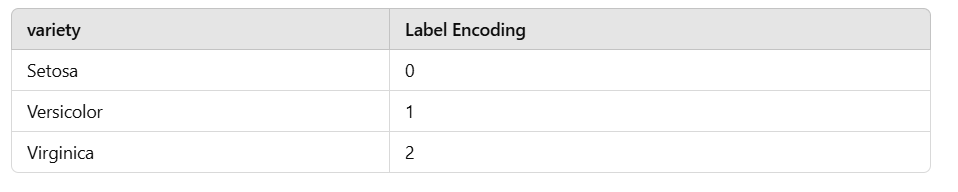

One-Hot Encoding (OHE - Egyedi bináris oszlopok)

A One-Hot Encoding minden egyes kategóriát külön oszlopba bont, ahol az adott kategóriánál 1-es, minden másnál 0-s érték szerepel.

Példa:
Ha a "variety" oszlopunk így néz ki:

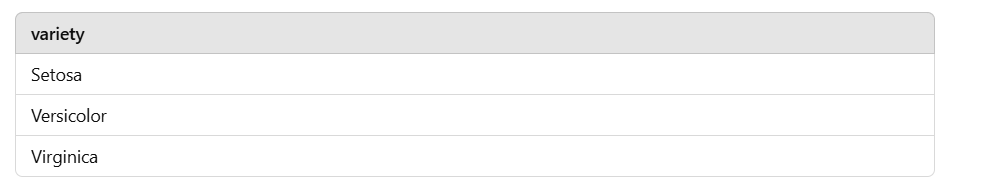
A One-Hot Encoding így néz ki:

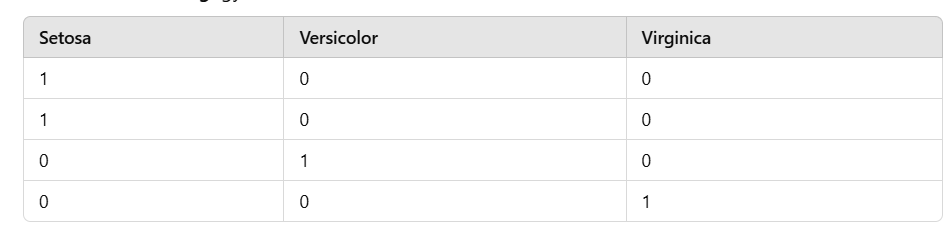

### Adatok véletlenszerű keverése

Ha az adatok rendezettséget tartalmaznak, az befolyásolhatja az elemzést és a modellezést. Ezért keverjük meg őket:




In [439]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
display(df_shuffled.head())

,sepal_length,sepal_width,petal.length,petal.width,variety_encoded,variety_Setosa,variety_Versicolor,variety_Virginica
0,6.1,2.8,4.7,1.2,1,False,True,False
1,5.7,3.8,1.7,0.3,0,True,False,False
2,7.7,3.8,6.7,2.2,2,False,False,True
3,6.0,2.9,4.5,1.5,1,False,True,False
4,6.8,2.8,4.8,1.4,1,False,True,False


Miért fontos?

- Az adathalmazban ne legyen semmilyen mesterséges sorrend.

### Hiányzó értékek pótlása (ha lennének)

Bár az Iris datasetben nincs hiányzó érték, más adathalmazokban gyakran előfordul.

Hiányzó értékek kitöltése átlaggal

In [456]:
df.fillna(df.mean(), inplace=True)

Miért fontos?

- Az átlag jó választás, ha az értékek normális eloszlásúak.

### Hiányzó értékek kitöltése kategóriás oszlopokban

In [461]:
# A 'variety_Setosa' oszlop hiányzó értékeinek kitöltése a módusszal (leggyakoribb érték).
#
# - df["variety_Setosa"].mode() → visszaadja az oszlop leggyakoribb értékét/értékeit
# - [0] → ha több módusz is van, az elsőt választjuk ki
# - fillna(...) → a hiányzó (NaN) értékeket ezzel pótoljuk
#
# A bal oldali hozzárendelés miatt az eredmény visszakerül az oszlopba.

df["variety_Setosa"] = df["variety_Setosa"].fillna(df["variety_Setosa"].mode()[0])

# Korrelációs elemzés

A korrelációs elemzés segít megérteni, hogy az egyes változók mennyire függnek össze egymással.

In [464]:
display(df.corr())


,sepal_length,sepal_width,petal.length,petal.width,variety_encoded,variety_Setosa,variety_Versicolor,variety_Virginica
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971,-0.718879,0.079280,0.642853
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987,0.601821,-0.473476,-0.128997
petal.length,0.873738,-0.426028,1.000000,0.962772,0.949402,-0.922494,0.206123,0.720018
petal.width,0.820620,-0.362894,0.962772,1.000000,0.956514,-0.886988,0.122833,0.768044
variety_encoded,0.786971,-0.422987,0.949402,0.956514,1.000000,-0.866030,0.005852,0.864556
variety_Setosa,-0.718879,0.601821,-0.922494,-0.886988,-0.866030,1.000000,-0.505051,-0.497468
variety_Versicolor,0.079280,-0.473476,0.206123,0.122833,0.005852,-0.505051,1.000000,-0.497468
variety_Virginica,0.642853,-0.128997,0.720018,0.768044,0.864556,-0.497468,-0.497468,1.000000


Miért fontos?

- Ha két változó nagyon korrelál, lehet, hogy az egyiket elhagyhatjuk a modellből.

### Outlier-ek (kiugró értékek) kezelése

Extrém adatok torzíthatják az elemzést.

### IQR módszer (Interquartilis tartomány)

In [472]:
# Interkvartilis tartomány (IQR) módszerrel szűrjük ki a kiugró (outlier) értékeket
# az 'sepal_length' oszlopból.

# Az első kvartilis (Q1, 25%-os percentilis)
Q1 = df["sepal_length"].quantile(0.25)

# A harmadik kvartilis (Q3, 75%-os percentilis)
Q3 = df["sepal_length"].quantile(0.75)

# IQR = Q3 - Q1 → interkvartilis tartomány, az adatok középső 50%-ának szélessége
IQR = Q3 - Q1

# Az outlierek tipikus szabálya:
# - alsó határ: Q1 - 1.5 * IQR
# - felső határ: Q3 + 1.5 * IQR
#
# Csak azokat az adatokat tartjuk meg, amelyek ezen a tartományon belül vannak.
df_cleaned = df[
    (df["sepal_length"] >= (Q1 - 1.5 * IQR)) &
    (df["sepal_length"] <= (Q3 + 1.5 * IQR))
]

# A tisztított DataFrame méretének kiíratása (sorok, oszlopok)
print(df_cleaned.shape)


(149, 8)


Miért fontos?

- Az IQR módszerrel kiszűrhetjük az extrém értékeket.

## CrossTab - A tapsolás adathalmazon

A tapsolás adathalmaza az Adelaide-i Egyetem „survey” adathalmaza.

Rövid összefoglaló:

- Minta: 237 elsőéves statisztika hallgató válaszai.
- Típus: Data frame (R-ben elérhető).
- Forrás: W. N. Venables & B. D. Ripley (2002): Modern Applied Statistics with S-PLUS. Springer.

Változók:

- Sex – nem (férfi/nő).
- Wr.Hnd / NW.Hnd – írókéz és nem-író kéz fesztávolsága (cm).
- W.Hnd – írókéz (bal/jobb).
- Fold – karba tett kéz: melyik van felül (jobb a balon / bal a jobbon / egyik sem).
- Pulse – pulzus (ütés/perc).
- Clap – tapsoláskor melyik kéz van felül (jobb/bal/egyik sem).
- Exer – mennyit sportol a hallgató (gyakran / néha / soha).
- Smoke – dohányzási szokások (heavy, regular, occasional, never).
- Height – magasság (cm).
- M.I – mértékegység típusa (imperial/metric).
- Age – életkor (év).

adatbázis [leírás](https://cran.r-project.org/web/packages/MASS/MASS.pdf#page=147) 147. oldal

In [476]:
import pandas as pd

df = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/survey.csv")
df

,rownames,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,Female,18.0,18.0,Right,L on R,85.0,Right,Some,Never,165.1,Imperial,17.667
233,234,Female,18.5,18.0,Right,L on R,88.0,Right,Some,Never,160.0,Metric,16.917
234,235,Female,17.5,16.5,Right,R on L,NaN,Right,Some,Never,170.0,Metric,18.583
235,236,Male,21.0,21.5,Right,R on L,90.0,Right,Some,Never,183.0,Metric,17.167


**Két kategórikus változó összehasonlítása:**

In [479]:
# Készítünk egy kereszttáblát (kontingenciatáblát) a Fold és W.Hnd oszlopok alapján.

# - df.Fold : a karba tett kéznél melyik kéz van felül (kategória).
# - df['W.Hnd'] : a hallgató írókeze (bal vagy jobb).

# A pd.crosstab megszámolja, hogy az egyes kombinációk hányszor fordulnak elő.
# Az eredmény egy táblázat, ahol a sorok a Fold kategóriák,
# az oszlopok pedig az írókéz (W.Hnd) kategóriái, és a cellák a gyakoriságokat mutatják.

pd.crosstab(df.Fold, df['W.Hnd']) # két kategórikus jellemző egyes értékeinek előfordulásának gyakorisága

W.Hnd,Left,Right
Fold,,
L on R,10,88
Neither,1,17
R on L,7,113
